# Requirements


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!pip install konlpy
!pip install nltk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (40.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and di

# Load File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
df_travel = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/여행스타그램_insta196.csv")
df_watch = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/관람_insta211.csv")
df_festival = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/축제_insta200.csv")

df=pd.concat([df_travel,df_watch,df_festival], ignore_index=True)
print(df.shape)

(608, 5)


# 

##### 태그 비었으면 삭제할까?, 본문 내용을 형태소별로 나눠서 해시태그처럼 이용할까...?

In [ ]:
df_tag = df.loc[:,['hashtag']]
# print(df_tag)

hash_tags = []
for tags in df_tag['hashtag']:
    temp = tags[2:-2].split("', '")
    for tag in temp:
        hash_tags.append(tag)


# hash_tags=list(set(hash_tags)) # 리스트 중복제거
print(hash_tags)




['충남', '당진', '예산', '여행스타그램', '아그로랜드', '젖소', '목장', '트랙터', '체험', '야생화', '판타지', '지도', '', '노는게제일좋은', '뽀로로', '리라', '백패킹', '백패커', '여행스타그램', '등산', '트레킹', '캠핑', '바다', '로제떼', '힐레베르그', '여행지추천', '여행스타그램', '청춘나길', '', '제주도', '6월제주도', 'jejuisland', '제주도오름', '제주여행', '오름의여왕', '대한민국힐링여행', 'korealandscape', 'ig_korea', '풍경사진', '여행스타그램', '풍경사진', '대한민국구석구석', 'koreatrevel', 'landscapephotography', 'landscape', 'selstagram셀스타그램', '동네찍사사진여행', '캠핑', '캠린이', '캠퍼', '캠크닉', '캠핑족', '캠핑에미치다', '캠핑소품', '캠핑장비', '캠핑소통', '캠핑요리', '여행스타그램', '여행', 'ad', '노르디스크맥주', 'gs25', '영상은이번주에열심히편집해야지💗', '소니', 'sony', 'a7r3', '소니미러리스', '사진스타그램', '여행스타그램', '풍경사진', '인물사진', '풍경스타그램', '소니이미지갤러리', '국내여행', 'sonyimagegalley', '아빠사진사', 'picture', 'sonyalpha', 'sonyimages', 'photography', 'ig_korea', '아인이네2016', '소통', '아빠진사', '인물스냅', '육아스타그램', '거제도여행', '사진', '여행스타그램', '여행', '취미', '일상', 'daily', '데일리', 'instadaily', 'likeforlikes', '좋아요', '감성', '소확행', '소통', '하늘', '풍경', 'today', '맞팔해요', 'fo

In [1]:
from collections import Counter
hash_tags_freq = Counter(hash_tags)
print(hash_tags_freq.most_common(20))

NameError: ignored

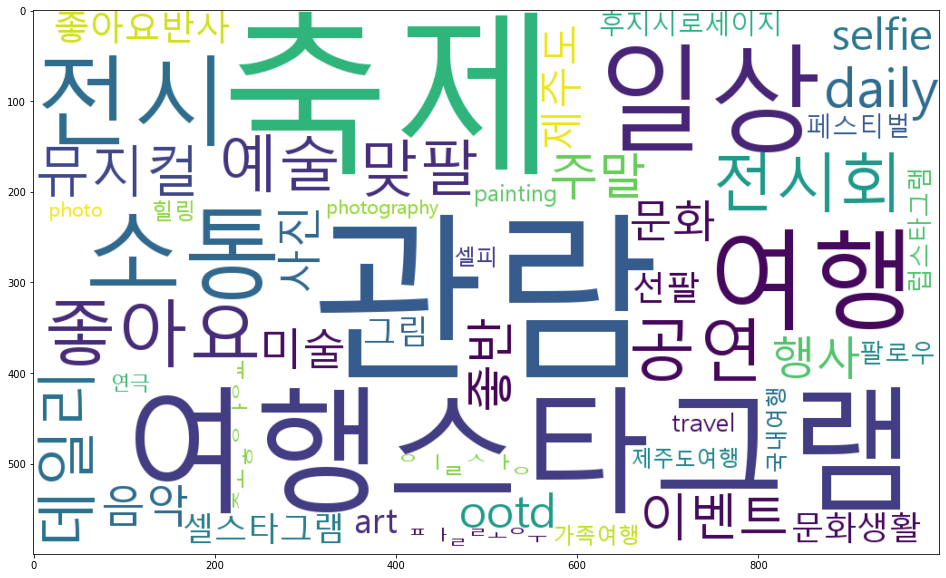

In [ ]:
#워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

font_path = "/content/drive/MyDrive/Colab Notebooks/MALGUN.TTF"

wc = WordCloud(width=1000, height=600, background_color="white", font_path=font_path, max_words=50)
wc = wc.generate_from_frequencies(hash_tags_freq)

plt.figure(figsize=(30,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis=('off')
plt.show()

In [ ]:
df_text = df.loc[:,['maintext']]
print(df_text)

text=''
for temp in df_text['maintext']:
  text+=temp

print(text)

                                              maintext
0                                                 17시간
1    많은 걸 감당하는 만큼, 그래서 기쁘고 기대되는 시간들과 함께 생각과 염려도 많아진...
2                                         제주에서살까바🌸 2시간
3                       이장님께서 염소똥 조심 하시랍니다. . . . 18시간
4    랜선여행 어제 영상에 이은 할슈타트 입니다 ! 저는 이렇게 반대편에서 바라보는 할슈...
..                                                 ...
603  4기가 기획한 이 개최되는 @parangkore 현장! 세팅을 마치고 도 끝내고 이...
604  www.jazzpandora.com 판도라뮤직 IKEA Lab Mid Sommar ...
605                                  수국이 수국하게 피는날 😉 1일
606  저희 시작한지 한달조금 넘는시간에 2000팔로우를 달성했습니다. 사랑해주신만큼 돌려...
607  . 드레스코드 잘 통하는 라온오빠와 오늘은 브라운🤎 (모든 사진 영상 불펌금지, 제...

[608 rows x 1 columns]
17시간많은 걸 감당하는 만큼, 그래서 기쁘고 기대되는 시간들과 함께 생각과 염려도 많아진다는 걸 오롯이 겪은 유월도 마무리되어가고. 여러 종류의 감정과 생각, 경험들 사이를 걸었던 계절로 기억될. 내가 겪고 결과물을 만들어내야 할 무수한 것들 사이에서 고민하고 마음 졸이던 시간을 지나고 나니. 더 고마운 건 내 일의 각각의 농도들을 더 정교하게 나에게 꼭 맞도록 재구성할 수 있게 되었고 또 다음 단계에서는 더 부드럽고 유연하게 나아갈 수 있을 거라는 것. 다채로운 시간들을 뒤로 하고 다시금 묵묵히 남은 일들을 잘 해내며 잔잔히 앉아있는 나를 보는 주말 끝 무

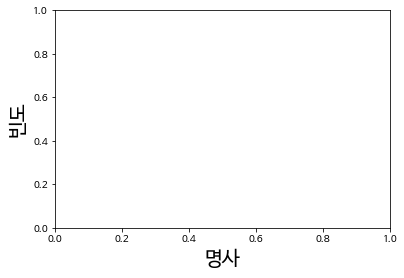

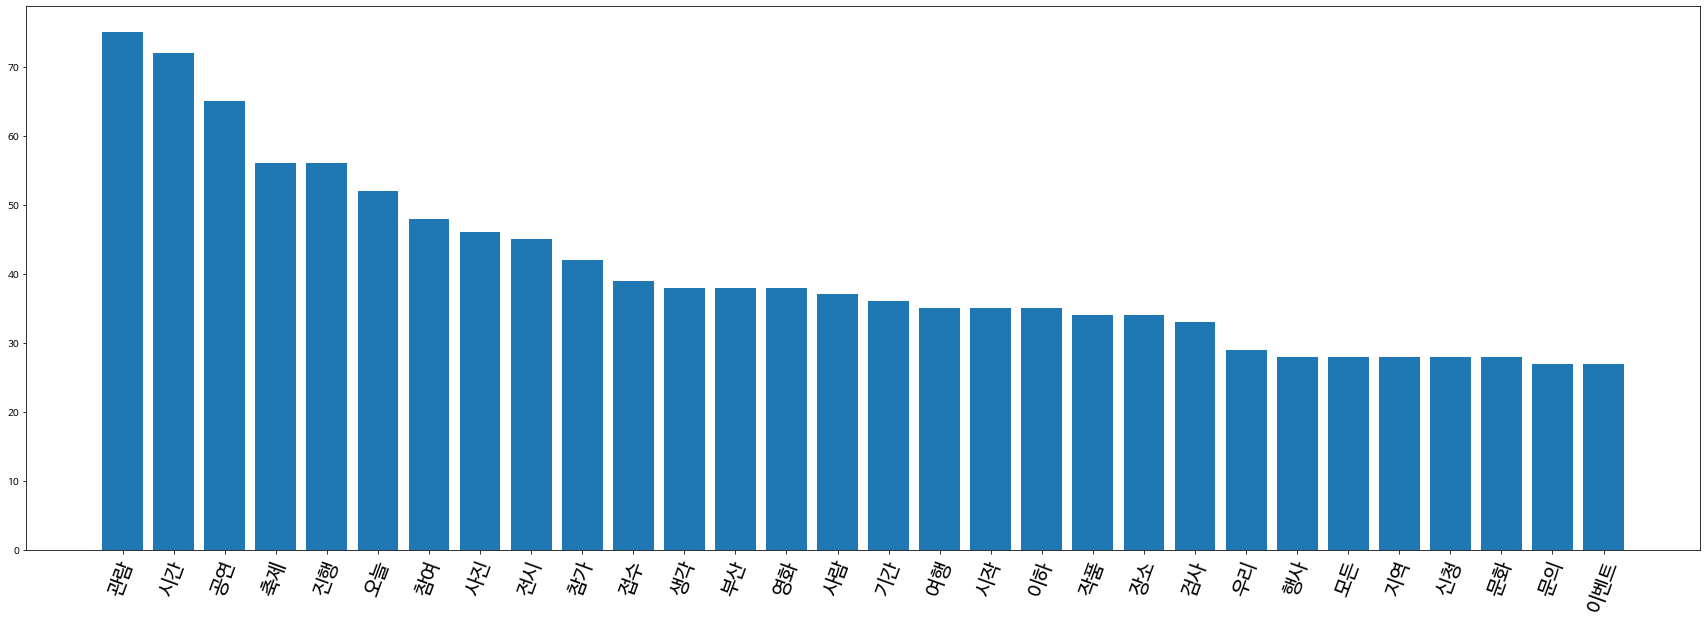

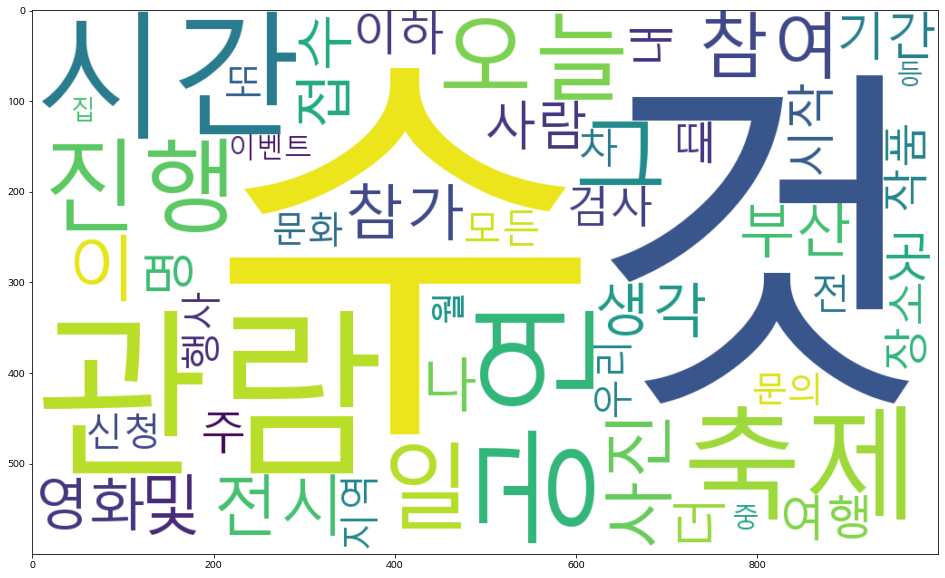

In [ ]:
from konlpy.tag import Okt
from nltk import Text
from matplotlib import font_manager, rc


# 트위터에서 만든 소셜 분석을 위한 형태소 분석기 Okt 사용
okt = Okt()
myList = okt.pos(text, norm=True, stem=True)  # 모든 형태소 추출
myList_filter = [x for x, y in myList if y in ['Noun']]

Okt = Text(myList_filter, name="Okt")

# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
plt.rc('font', family='NanumBarunGothic') 



# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(50):
    if (len(str(tags)) > 1):
        wordInfo[tags] = counts

values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)

# 그래프 x, y 라벨 설정
plt.xlabel("명사",fontsize=20)
plt.ylabel("빈도",fontsize=20)
plt.figure(figsize=(30,10))
# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70',fontsize=20)
plt.show()


# wordCloud 출력
wc = WordCloud(width=1000, height=600, background_color="white", font_path=font_path, max_words=50)
plt.figure(figsize=(30,10))
plt.imshow(wc.generate_from_frequencies(Okt.vocab()),interpolation='bilinear')
plt.axis=('off')
plt.show()

In [3]:
from selenium import webdriver
from konlpy.tag import Okt
from nltk import Text
from matplotlib import font_manager, rc
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import time

path = "chromedriver.exe"  # 웹드라이버 실행

driver = webdriver.Chrome(path)  # 드라이버 경로 설정
url_list = []  # 블로그 url을 저장하기 위한 변수
content_list = ""  # 블로그 content를 누적하기 위한 변수
text = "관광"  # 검색어

for i in range(1, 3):  # 1~2페이지까지의 블로그 내용을 읽어옴
    url = 'https://section.blog.naver.com/Search/Post.nhn?pageNo=' + str(
        i) + '&rangeType=ALL&orderBy=sim&keyword=' + text  # url 값 설정
    driver.get(url)
    time.sleep(0.5)  # 오류 방지 sleep

    for j in range(1, 3):
        titles = driver.find_element_by_xpath(
            '/html/body/ui-view/div/main/div/div/section/div[2]/div[' + str(j) + ']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)

print("url 수집 끝, 해당 url 데이터 크롤링")

for url in url_list:  # 저장했던 블로그 하나씩 순회
    driver.get(url)

    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default"  # 내용 크롤링
    contents = driver.find_elements_by_css_selector(overlays)

    for content in contents:
        content_list = content_list + content.text  # 각 블로그의 내용을 변수에 누적함

# 트위터에서 만든 소셜 분석을 위한 형태소 분석기 Okt 사용
okt = Okt()
myList = okt.pos(content_list, norm=True, stem=True)  # 모든 형태소 추출
myList_filter = [x for x, y in myList if y in ['Noun']]

Okt = Text(myList_filter, name="Okt")

# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

# 그래프 x, y 라벨 설정
plt.xlabel("명사")
plt.ylabel("빈도")

# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(50):
    if (len(str(tags)) > 1):
        wordInfo[tags] = counts

values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)

# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()

# wordCloud 출력
wc = WordCloud(width=1000, height=600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()

ModuleNotFoundError: ignored